In [1]:
# Import the required functions from your lunar library
from lunar.find_contours import find_contours_from_videos
from lunar.plot_contours import plot_contours
from lunar.identify_glare import process_large_file
from lunar.label_tanx import analyze_contours
from lunar import match_cameras
from lunar import plot_matched
from lunar import smooth_contours
from lunar.plot_glare_contours import plot_glare_contours
from lunar.identify_glare import clip_ends




In [2]:
# Define parameters for processing first video
video_pattern = '/Users/oakley/Downloads/out_*.mp4'
output_suffix = '24Jul2024.tsv'
black_threshold = 200
min_area = 15
max_area = 1000
brightness_threshold = 100 #used to decide if lights were on
threads = 2  


# Process video and generate contours file
# This takes several hours to process
# Change to code to execute if necessary

find_contours_from_videos(
    video_pattern=video_pattern,
    black=black_threshold,
    minArea=min_area,
    maxArea=max_area,
    brightnessThreshold=brightness_threshold,
    threads=threads,
    outfile=output_suffix
)


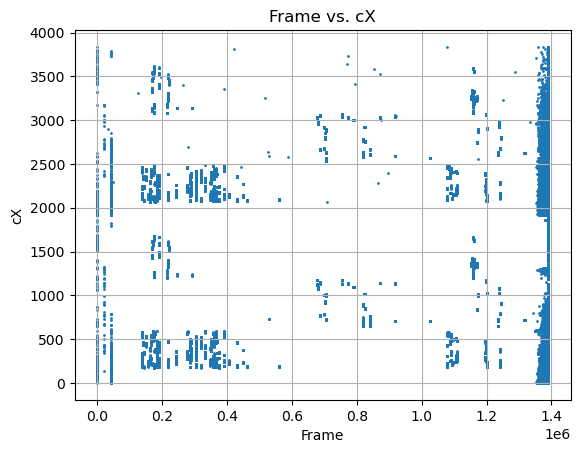

In [3]:
# Plot the contours data
output_file = 'contours_' + output_suffix
plot_contours(output_file)

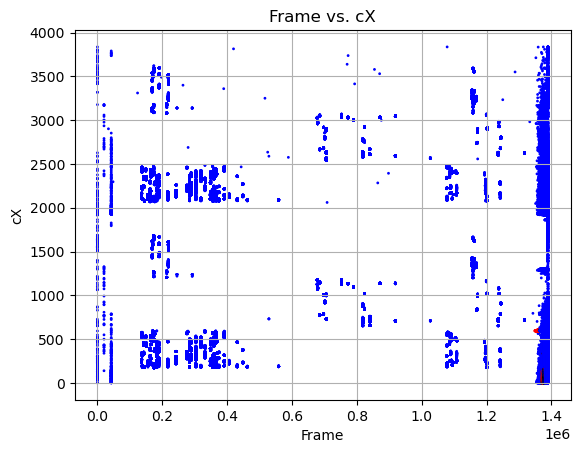

In [4]:
# Identify glare in contour file
process_large_file(
    input_file='contours_' + output_suffix,
    output_file='glare_' + output_suffix,
    min_cluster_size=10000,
    eps=0.1,
    min_samples=50,
    chunksize=100000
)

# Plot the glare-processed results
plot_contours('glare_' + output_suffix, glare=True)  # Change last to True to color by cluster

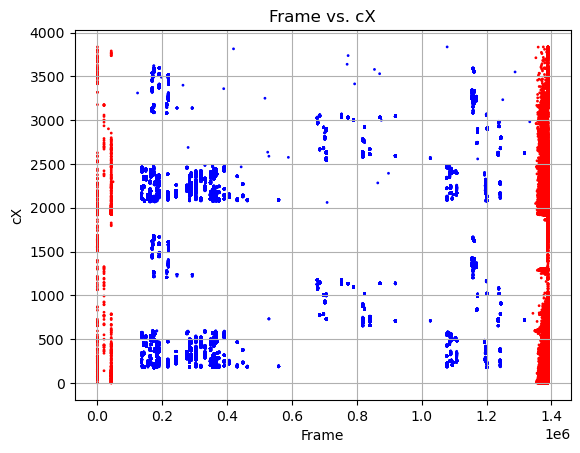

In [5]:
clip_ends(
    input_file = 'glare_' + output_suffix,
    output_file = 'vglare_' + output_suffix,
    low_clip = 60000,
    hi_clip = 1340000
)

# Plot the glare-processed results
plot_contours('vglare_' + output_suffix, glare=True)

In [6]:
# Analyze the contours to label tanks
tank_boundaries = [164, 627, 1198, 1705, 2040, 2493, 3068, 3635]
analyze_contours('vglare_' + output_suffix, tank_boundaries)

Removed 861927 rows labeled as glare.
Analysis complete. Results saved to analyzed_vglare_24Jul2024.tsv


,frame,cX,cY,area,minI,maxI,meanI,video,glare,camera,tank,cXtank
1180,124048,3311.0,1079.0,18.0,0.0,214.0,193.571429,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank3,243.0
1181,136439,230.0,279.0,27.0,201.0,250.0,223.184211,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank1,66.0
1182,136439,2129.0,295.0,39.5,201.0,255.0,235.711538,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank1,89.0
1183,136437,2131.0,293.0,18.5,202.0,255.0,233.518519,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank1,91.0
1184,136438,2131.0,294.0,32.5,203.0,255.0,234.681818,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank1,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86585,1317000,718.0,297.0,21.5,201.0,255.0,235.176471,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,91.0
86586,1317005,718.0,299.0,15.0,202.0,255.0,236.869565,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,91.0
86587,1317036,2626.0,342.0,17.0,201.0,255.0,231.200000,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,133.0
86588,1317037,2626.0,342.0,17.0,201.0,255.0,231.200000,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,133.0


In [11]:
match_cameras(
    'analyzed_vglare_' + output_suffix,  # Input file
    'matched_' + output_suffix,         # Output file
    distance_x=200,                     # Maximum allowed difference for cX
    distance_y=100                      # Maximum allowed difference for cY
)


Updated data has been written to matched_24Jul2024.tsv


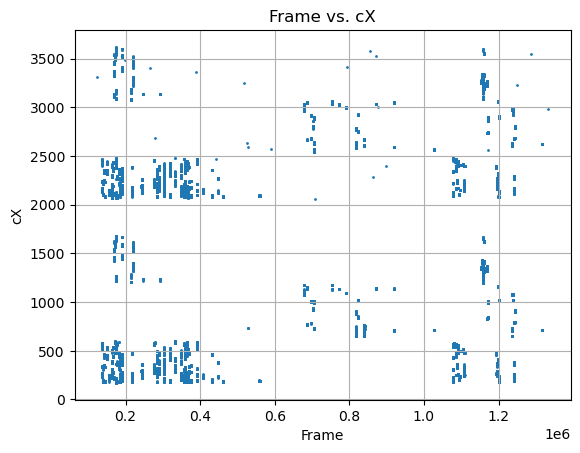

In [7]:
plot_contours('matched_' + output_suffix)

Smoothed data saved to smooth_24Jul2024.tsv
Plot saved to 24Jul2024.png


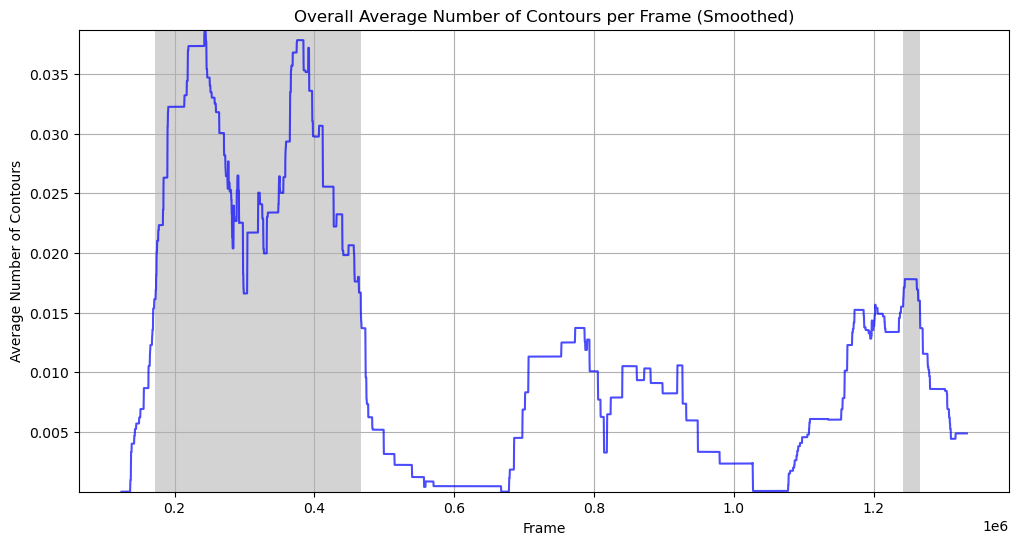

In [12]:
smooth_contours(
    input_file='matched_' + output_suffix,
    outfile_suffix = output_suffix,
    window=108000,
    pad=True,  #Pads beginning with zeros to not get edge artifact
    date='July 24, 2024'
)